## Data Analysis Project Using Python

In [ ]:
'''Zomato has an average of 17.5 million monthly transacting customers for its food delivery business. Average monthly active food delivery restaurant 
partners on Zomato's platform have also increased by 8.7% year-on-year, from 208000 to 226000. You are working in a data-driven role at Zomato. 
You have a dataset of customers. As a data professional, you need to analyze the data, perform EDA(Exploratory Data Analysis) and visualization,
and ans the question'''

## Step 1 - Importing Libraries

In [9]:
#for data manipulation and analysis
import pandas as pd

# for numerical operations
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Creating DataFrame

In [12]:
df = pd.read_csv('Zomato data .csv')
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

## Data Cleaning and Pre-processing

### Converting the data type of column- rate

In [18]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [24]:
## Summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### conclusion - There is no Null-value in dataFrame

## 1- What type of restaurant do the majority of customer order from?

In [28]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

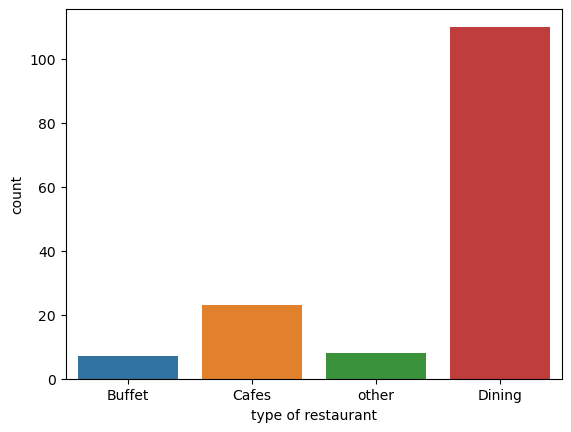

In [30]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaurant')

### conclusion - majority of the resturant falls in dinning category

## 2 - How many votes has each type of resturant received from customers?

In [36]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

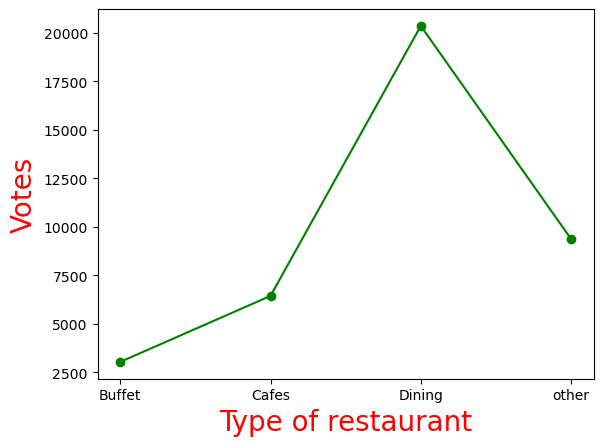

In [40]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green',marker='o')
plt.xlabel("Type of restaurant", c= 'red',size=20)
plt.ylabel("Votes",c='red',size=20)

### conclusion - dinnign resstaurant has recieved maximum votes

## What are the ratings that the majority of restaurant have recived?

In [44]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


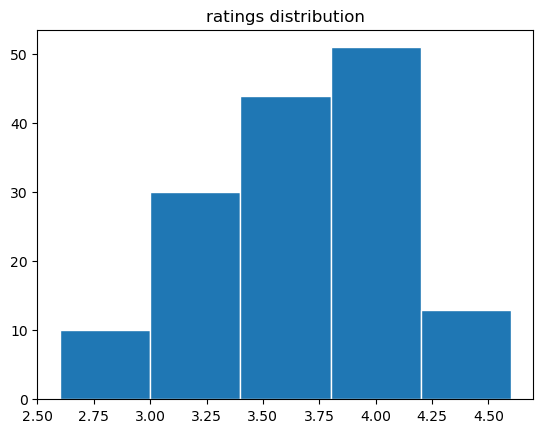

In [60]:
plt.hist(df['rate'],bins = 5, edgecolor="white")
plt.title('ratings distribution')
plt.show()

### conclusion - majority resturant received ratings from 3.5 to 4.00

## 4) Zomato has observed that most couples order most of their food online. What is their average spending on each order?

### Average order spending by couples

In [64]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

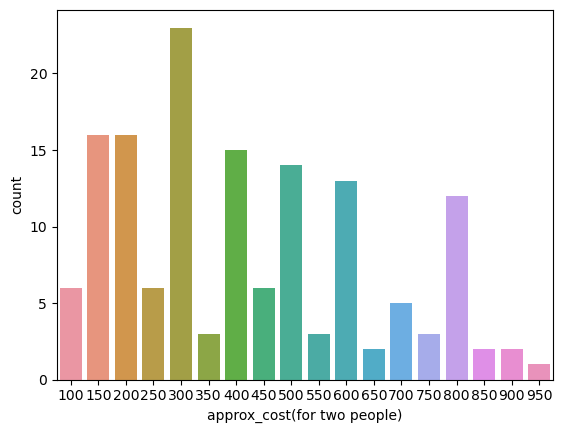

In [66]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

### conclusion - majority  of couple preferr resturants with an approx cost of 300 rupees

## 5) Which mode (online or offline) has received the maximum rating?

In [74]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

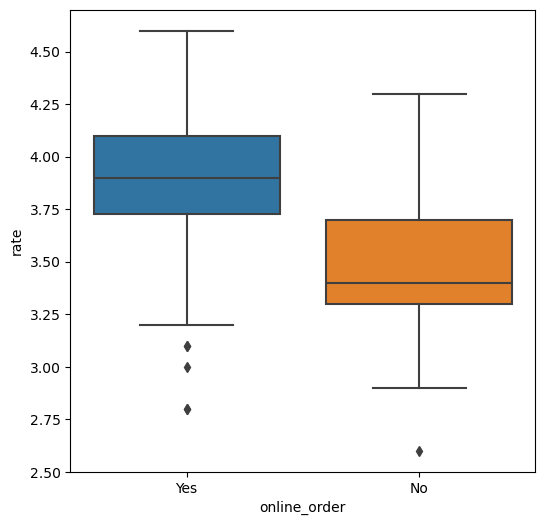

In [78]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df )

### conclusion - offline order recieve lower rating(3.75 to 3.25) in comarison to online order (4.15 to 3.75)

## 6) Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?

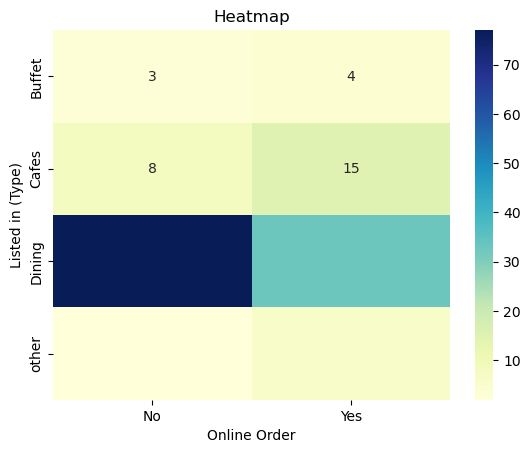

In [84]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table,annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

### Conclusion - Dinning restaurants primarily accepts offline orders, whereas cafes primarily receive online orders. This suggests that clients preferense order in person at restaurants, but prefer online ordering at cafes.